# Impoting the libraries

In [1]:
import numpy as np
import pandas as pd
import random

import matplotlib.pyplot as plt
import seaborn as sns

import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

from sklearn.preprocessing import LabelEncoder

colors = [
    '#FF5733', '#33FF57', '#3357FF', '#FF33A6', '#33FFF6', '#FFD700', '#FF6347', '#40E0D0', '#DAA520', '#FF4500',
    '#B22222', '#8B008B', '#FF8C00', '#006400', '#4682B4', '#9ACD32', '#4169E1', '#6495ED', '#DC143C', '#00CED1',
    '#FFDAB9', '#9932CC', '#FF00FF', '#7B68EE', '#00FA9A', '#FF1493', '#FF69B4', '#8B0000', '#4B0082'
]

In [2]:
crop = pd.read_csv("Datasets/Crop_recommendation.csv")
fertilizer = pd.read_csv("Datasets/Fertilizer Prediction.csv")

### Checking if dataset is loaded correctly

In [3]:
crop.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [4]:
fertilizer.head()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26,52,38,Sandy,Maize,37,0,0,Urea
1,29,52,45,Loamy,Sugarcane,12,0,36,DAP
2,34,65,62,Black,Cotton,7,9,30,14-35-14
3,32,62,34,Red,Tobacco,22,0,20,28-28
4,28,54,46,Clayey,Paddy,35,0,0,Urea


# Dataset Structure Information

In [5]:
crop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [6]:
fertilizer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Temparature      99 non-null     int64 
 1   Humidity         99 non-null     int64 
 2   Moisture         99 non-null     int64 
 3   Soil Type        99 non-null     object
 4   Crop Type        99 non-null     object
 5   Nitrogen         99 non-null     int64 
 6   Potassium        99 non-null     int64 
 7   Phosphorous      99 non-null     int64 
 8   Fertilizer Name  99 non-null     object
dtypes: int64(6), object(3)
memory usage: 7.1+ KB


# Shape of Datasets

In [7]:
fertilizer.shape

(99, 9)

In [8]:
crop.shape

(2200, 8)

# Look for Empty/Null points

In [9]:
fertilizer.isnull().sum()

Temparature        0
Humidity           0
Moisture           0
Soil Type          0
Crop Type          0
Nitrogen           0
Potassium          0
Phosphorous        0
Fertilizer Name    0
dtype: int64

In [10]:
crop.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

# List of Crops

In [11]:
print("Number of various crops: ", len(crop['label'].unique()))
print("List of crops: ", crop['label'].unique())

Number of various crops:  22
List of crops:  ['rice' 'maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans'
 'mungbean' 'blackgram' 'lentil' 'pomegranate' 'banana' 'mango' 'grapes'
 'watermelon' 'muskmelon' 'apple' 'orange' 'papaya' 'coconut' 'cotton'
 'jute' 'coffee']


# List of Fertilizers

In [12]:
print("Number of various fertilizers: ", len(fertilizer['Fertilizer Name'].unique()))
print("List of Fertilizers: ", fertilizer['Fertilizer Name'].unique())

Number of various fertilizers:  7
List of Fertilizers:  ['Urea' 'DAP' '14-35-14' '28-28' '17-17-17' '20-20' '10-26-26']



# Crop Distribution Visualization

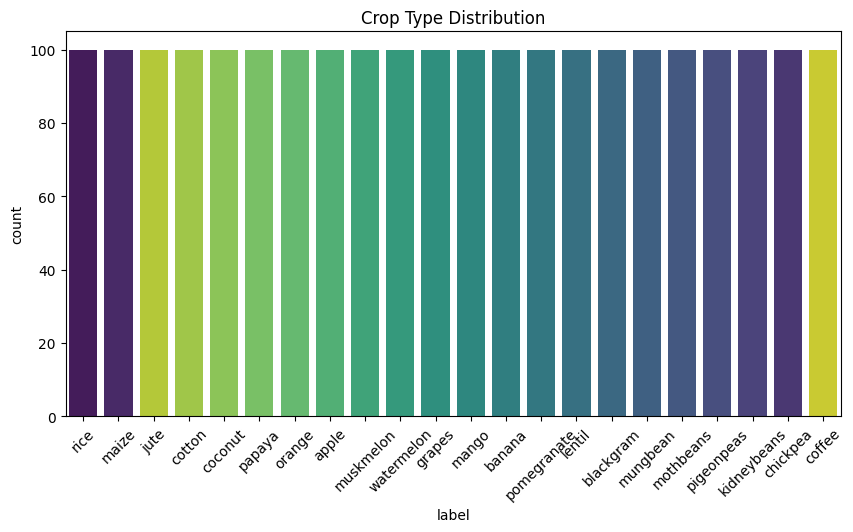

In [13]:
plt.figure(figsize=(10, 5))
sns.countplot(
    x='label',
    data=crop,
    order=crop['label'].value_counts().index,
    palette='viridis',
    hue='label',
    dodge=False,  # Ensures bars are not split by hue
    legend=False  # Disable legend if unnecessary
)
plt.xticks(rotation=45)
plt.title('Crop Type Distribution')
plt.show()

# Fertilizer Distribution Visualizaton

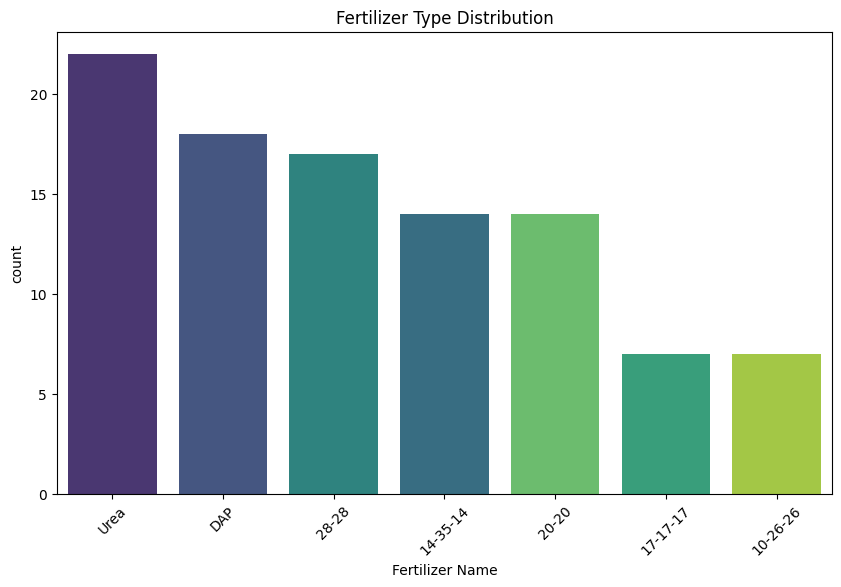

In [14]:
plt.figure(figsize=(10, 6))
sns.countplot(
    x='Fertilizer Name',
    data=fertilizer,
    order=fertilizer['Fertilizer Name'].value_counts().index,
    palette='viridis',
    hue='Fertilizer Name',
    legend=False  # Disable legend if unnecessary
)
plt.xticks(rotation=45)
plt.title('Fertilizer Type Distribution')
plt.show()

# Value Counts for both

In [15]:
crop['label'].value_counts()

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

In [16]:
fertilizer['Fertilizer Name'].value_counts()

Fertilizer Name
Urea        22
DAP         18
28-28       17
14-35-14    14
20-20       14
17-17-17     7
10-26-26     7
Name: count, dtype: int64

# Data Preprocessing.

In [17]:
crop_summary = pd.pivot_table(crop,index=['label'],aggfunc='mean')
crop_summary.head()

,K,N,P,humidity,ph,rainfall,temperature
label,,,,,,,
apple,199.89,20.80,134.22,92.333383,5.929663,112.654779,22.630942
banana,50.05,100.23,82.01,80.358123,5.983893,104.626980,27.376798
blackgram,19.24,40.02,67.47,65.118426,7.133952,67.884151,29.973340
chickpea,79.92,40.09,67.79,16.860439,7.336957,80.058977,18.872847
coconut,30.59,21.98,16.93,94.844272,5.976562,175.686646,27.409892


# Encoding the Categorical Datas.

In [18]:
encoder = LabelEncoder()

columns_to_encode = ['Soil Type', 'Crop Type']

fertilizer[columns_to_encode] = fertilizer[columns_to_encode].apply(encoder.fit_transform)

In [19]:
fertilizer.head()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26,52,38,4,3,37,0,0,Urea
1,29,52,45,2,8,12,0,36,DAP
2,34,65,62,0,1,7,9,30,14-35-14
3,32,62,34,3,9,22,0,20,28-28
4,28,54,46,1,6,35,0,0,Urea


In [20]:
fertilizer_names = {index : label for index, label in enumerate(encoder.classes_)}

fertilizer_names

{0: 'Barley',
 1: 'Cotton',
 2: 'Ground Nuts',
 3: 'Maize',
 4: 'Millets',
 5: 'Oil seeds',
 6: 'Paddy',
 7: 'Pulses',
 8: 'Sugarcane',
 9: 'Tobacco',
 10: 'Wheat'}

In [21]:
fertilizer_summary = pd.pivot_table(fertilizer,index=['Fertilizer Name'],aggfunc='mean')
fertilizer_summary.head()

,Crop Type,Humidity,Moisture,Nitrogen,Phosphorous,Potassium,Soil Type,Temparature
Fertilizer Name,,,,,,,,
10-26-26,6.857143,58.142857,39.285714,7.571429,17.714286,17.714286,2.142857,29.714286
14-35-14,4.571429,61.142857,45.214286,8.214286,29.571429,8.571429,1.857143,31.357143
17-17-17,4.285714,57.571429,47.142857,12.142857,13.142857,13.000000,2.571429,29.000000
20-20,6.071429,57.571429,45.285714,11.214286,11.571429,0.000000,1.714286,29.142857
28-28,5.294118,58.117647,41.941176,22.647059,21.058824,0.000000,2.352941,29.529412


# Data Visualiztion and Analysis for Crops

### Nitrogen Analysis

In [22]:
crop_summary_N = crop_summary.sort_values(by='N', ascending=False)
fig = make_subplots(rows=1, cols=2)
top = {
    'y' : crop_summary_N['N'][0:10].sort_values().index,
    'x' : crop_summary_N['N'][0:10].sort_values()
}
last = {
    'y' : crop_summary_N['N'][-10:].index,
    'x' : crop_summary_N['N'][-10:]
}
fig.add_trace(
    go.Bar(top,
           name="Most nitrogen required",
           marker_color=random.choice(colors),
           orientation='h',
          text=top['x']),
    row=1, col=1
)
fig.add_trace(
    go.Bar(last,
           name="Least nitrogen required",
           marker_color=random.choice(colors),
           orientation='h',
          text=last['x']),
    row=1, col=2
)
fig.update_traces(texttemplate='%{text}', textposition='inside')
fig.update_layout(title_text="Nitrogen (N)",
                  plot_bgcolor='white',
                  font_size=12, 
                  font_color='black',
                 height=500)
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

### Phosphorous Analysis

In [23]:
crop_summary_P = crop_summary.sort_values(by='P', ascending=False)
fig = make_subplots(rows=1, cols=2)
top = {
    'y' : crop_summary_P['P'][0:10].sort_values().index,
    'x' : crop_summary_P['P'][0:10].sort_values()
}
last = {
    'y' : crop_summary_P['P'][-10:].index,
    'x' : crop_summary_P['P'][-10:]
}
fig.add_trace(
    go.Bar(top,
           name="Most Phosphorous required",
           marker_color=random.choice(colors),
           orientation='h',
          text=top['x']),
    row=1, col=1
)
fig.add_trace(
    go.Bar(last,
           name="Least Phosphorous required",
           marker_color=random.choice(colors),
           orientation='h',
          text=last['x']),
    row=1, col=2
)
fig.update_traces(texttemplate='%{text}', textposition='inside')
fig.update_layout(title_text="Phosphorous (P)",
                  plot_bgcolor='white',
                  font_size=12, 
                  font_color='black',
                 height=500)
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

### Potassium Analysis

In [24]:
crop_summary_K = crop_summary.sort_values(by='K', ascending=False)
fig = make_subplots(rows=1, cols=2)
top = {
    'y' : crop_summary_K['K'][0:10].sort_values().index,
    'x' : crop_summary_K['K'][0:10].sort_values()
}
last = {
    'y' : crop_summary_K['K'][-10:].index,
    'x' : crop_summary_K['K'][-10:]
}
fig.add_trace(
    go.Bar(top,
           name="Most potassium required",
           marker_color=random.choice(colors),
           orientation='h',
          text=top['x']),
    row=1, col=1
)
fig.add_trace(
    go.Bar(last,
           name="Least potassium required",
           marker_color=random.choice(colors),
           orientation='h',
          text=last['x']),
    row=1, col=2
)
fig.update_traces(texttemplate='%{text}', textposition='inside')
fig.update_layout(title_text="Potassium (K)",
                  plot_bgcolor='white',
                  font_size=12, 
                  font_color='black',
                 height=500)
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

### Nitrogen, Phosphorous, Potassium values comparision between crops

In [25]:
fig = go.Figure()
fig.add_trace(go.Bar(
    x=crop_summary.index,
    y=crop_summary['N'],
    name='Nitrogen',
    marker_color='purple'
))
fig.add_trace(go.Bar(
    x=crop_summary.index,
    y=crop_summary['P'],
    name='Phosphorous',
    marker_color='#8B0000'
))
fig.add_trace(go.Bar(
    x=crop_summary.index,
    y=crop_summary['K'],
    name='Potassium',
    marker_color='crimson'
))
fig.update_layout(title="Nitrogen, Phosphorous, Potassium values comparision between crops",
                  plot_bgcolor='white',
                  barmode='group',
                  xaxis_tickangle=-45)
fig.show()

### Nitrogen, Phosphorous, Potassium ratio for rice, cotton, jute, maize, lentil


In [26]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

labels = ['Nitrogen(N)', 'Phosphorous(P)', 'Potash(K)']
specs = [[{'type': 'domain'}, {'type': 'domain'}, {'type': 'domain'}, {'type': 'domain'}, {'type': 'domain'}],
         [{'type': 'domain'}, {'type': 'domain'}, {'type': 'domain'}, {'type': 'domain'}, {'type': 'domain'}]]
# Increase vertical spacing
fig = make_subplots(rows=2, cols=5, specs=specs, vertical_spacing=0.4)  # Adjusted from default (0.3)

cafe_colors = ['rgb(255, 128, 0)', 'rgb(0, 153, 204)', 'rgb(173, 173, 133)']

# Add traces (no change in this part)
apple_npk = crop_summary[crop_summary.index == 'apple']
values = [apple_npk['N'][0], apple_npk['P'][0], apple_npk['K'][0]]
fig.add_trace(go.Pie(labels=labels, values=values, name="Apple", marker_colors=cafe_colors), 1, 1)

banana_npk = crop_summary[crop_summary.index == 'banana']
values = [banana_npk['N'][0], banana_npk['P'][0], banana_npk['K'][0]]
fig.add_trace(go.Pie(labels=labels, values=values, name="Banana", marker_colors=cafe_colors), 1, 2)

grapes_npk = crop_summary[crop_summary.index == 'grapes']
values = [grapes_npk['N'][0], grapes_npk['P'][0], grapes_npk['K'][0]]
fig.add_trace(go.Pie(labels=labels, values=values, name="Grapes", marker_colors=cafe_colors), 1, 3)

orange_npk = crop_summary[crop_summary.index == 'orange']
values = [orange_npk['N'][0], orange_npk['P'][0], orange_npk['K'][0]]
fig.add_trace(go.Pie(labels=labels, values=values, name="Orange", marker_colors=cafe_colors), 1, 4)

mango_npk = crop_summary[crop_summary.index == 'mango']
values = [mango_npk['N'][0], mango_npk['P'][0], mango_npk['K'][0]]
fig.add_trace(go.Pie(labels=labels, values=values, name="Mango", marker_colors=cafe_colors), 1, 5)

coconut_npk = crop_summary[crop_summary.index == 'coconut']
values = [coconut_npk['N'][0], coconut_npk['P'][0], coconut_npk['K'][0]]
fig.add_trace(go.Pie(labels=labels, values=values, name="Coconut", marker_colors=cafe_colors), 2, 1)

papaya_npk = crop_summary[crop_summary.index == 'papaya']
values = [papaya_npk['N'][0], papaya_npk['P'][0], papaya_npk['K'][0]]
fig.add_trace(go.Pie(labels=labels, values=values, name="Papaya", marker_colors=cafe_colors), 2, 2)

pomegranate_npk = crop_summary[crop_summary.index == 'pomegranate']
values = [pomegranate_npk['N'][0], pomegranate_npk['P'][0], pomegranate_npk['K'][0]]
fig.add_trace(go.Pie(labels=labels, values=values, name="Pomegranate", marker_colors=cafe_colors), 2, 3)

watermelon_npk = crop_summary[crop_summary.index == 'watermelon']
values = [watermelon_npk['N'][0], watermelon_npk['P'][0], watermelon_npk['K'][0]]
fig.add_trace(go.Pie(labels=labels, values=values, name="Watermelon", marker_colors=cafe_colors), 2, 4)

muskmelon_npk = crop_summary[crop_summary.index == 'muskmelon']
values = [muskmelon_npk['N'][0], muskmelon_npk['P'][0], muskmelon_npk['K'][0]]
fig.add_trace(go.Pie(labels=labels, values=values, name="Muskmelon", marker_colors=cafe_colors), 2, 5)

# Update layout (annotations remain the same)
fig.update_layout(
    title_text="Nitrogen, Phosphorous, Potassium ratio for fruits",
    annotations=[
        dict(text='Apple', x=0.05, y=1.15, font_size=15, showarrow=False),
        dict(text='Banana', x=0.25, y=1.15, font_size=15, showarrow=False),
        dict(text='Grapes', x=0.50, y=1.15, font_size=15, showarrow=False),
        dict(text='Orange', x=0.75, y=1.15, font_size=15, showarrow=False),
        dict(text='Mango', x=0.95, y=1.15, font_size=15, showarrow=False),
        dict(text='Coconut', x=0.05, y=0.45, font_size=15, showarrow=False),  # Adjusted to match vertical_spacing
        dict(text='Papaya', x=0.25, y=0.45, font_size=15, showarrow=False),
        dict(text='Pomegranate', x=0.50, y=0.45, font_size=15, showarrow=False),
        dict(text='Watermelon', x=0.75, y=0.45, font_size=15, showarrow=False),
        dict(text='Muskmelon', x=0.95, y=0.45, font_size=15, showarrow=False)
    ]
)
fig.show()


C:\Users\oyjaa\AppData\Local\Temp\ipykernel_6332\1906173184.py:14: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

C:\Users\oyjaa\AppData\Local\Temp\ipykernel_6332\1906173184.py:18: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

C:\Users\oyjaa\AppData\Local\Temp\ipykernel_6332\1906173184.py:22: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

C:\Users\oyjaa\AppData\Local\Temp\ipykernel_6332\1906173184.py:26: FutureWarning:

Series.__getit

### Scatter Plot for crops based on temperature and humidity

In [27]:
crop_scatter = crop[(crop['label']=='rice') | 
                      (crop['label']=='jute') | 
                      (crop['label']=='cotton') |
                     (crop['label']=='maize') |
                     (crop['label']=='lentil')]

fig = px.scatter(crop_scatter, x="temperature", y="humidity", color="label", symbol="label")
fig.update_layout(plot_bgcolor='white')
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()


### Comparison between Temperature, Humidity, and Rainfall

In [28]:
fig = px.bar(crop_summary, x=crop_summary.index, y=["temperature", "humidity", "rainfall"])
fig.update_layout(title_text="Comparision between rainfall, temerature and humidity",
                  plot_bgcolor='white',
                 height=500)

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

### Correlation between different features

Text(0.5, 1.0, 'Correlation between Different Features')

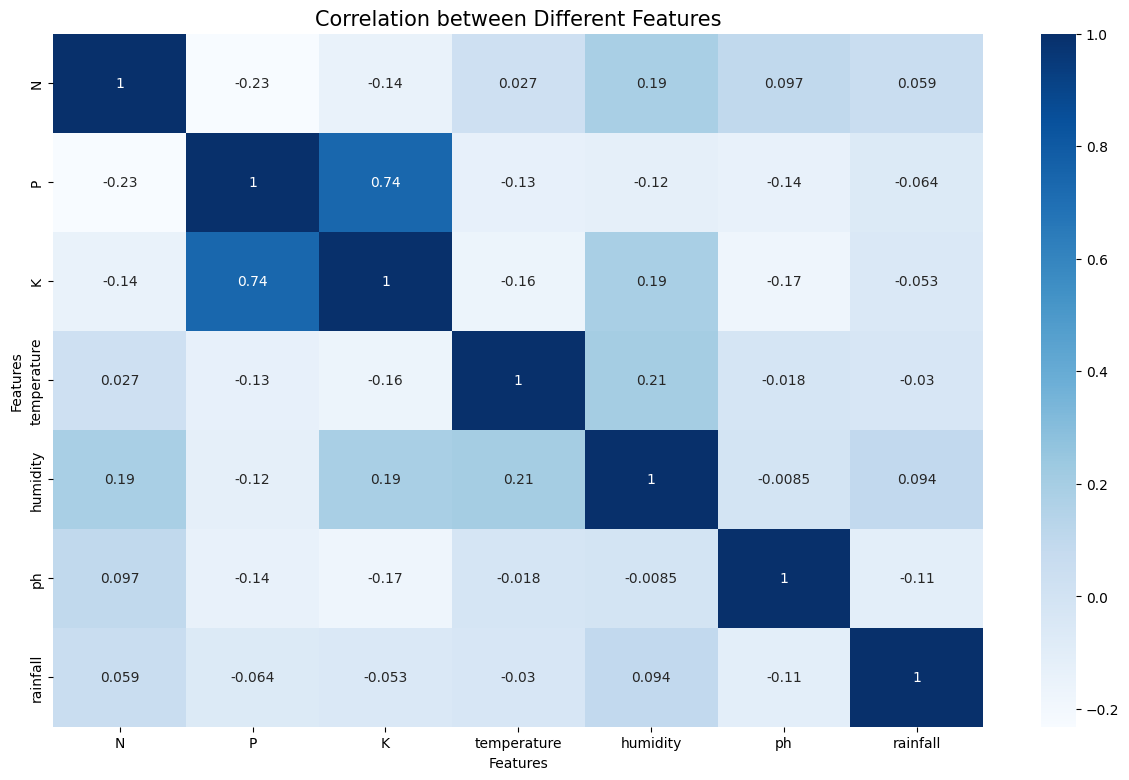

In [30]:
# Select only numeric columns
numeric_data = crop.select_dtypes(include=['number'])

# Create a figure and a set of subplots
fig, ax = plt.subplots(1, 1, figsize=(15, 9))

# Create the heatmap
sns.heatmap(numeric_data.corr(), annot=True, cmap='Blues')  # Change 'Purples' to 'Blues'
ax.set(xlabel='Features')
ax.set(ylabel='Features')

# Customize the plot
plt.title('Correlation between Different Features', fontsize=15, c='black')

# Display the plot

### Data Visualiztion and Analysis for Fertilizers

#### Nitrogen Analysis

In [31]:
fertilizer_summary_N = fertilizer_summary.sort_values(by='Nitrogen', ascending=False)
fig = make_subplots(rows=1, cols=2)
top = {
    'y' : fertilizer_summary_N['Nitrogen'][0:10].sort_values().index,
    'x' : fertilizer_summary_N['Nitrogen'][0:10].sort_values()
}
last = {
    'y' : fertilizer_summary_N['Nitrogen'][-10:].index,
    'x' : fertilizer_summary_N['Nitrogen'][-10:]
}
fig.add_trace(
    go.Bar(top,
           name="Most nitrogen required",
           marker_color=random.choice(colors),
           orientation='h',
          text=top['x']),
    row=1, col=1
)
fig.add_trace(
    go.Bar(last,
           name="Least nitrogen required",
           marker_color=random.choice(colors),
           orientation='h',
          text=last['x']),
    row=1, col=2
)
fig.update_traces(texttemplate='%{text}', textposition='inside')
fig.update_layout(title_text="Nitrogen (Nitrogen)",
                  plot_bgcolor='white',
                  font_size=12, 
                  font_color='black',
                 height=500)
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()


#### Phosphorus Analysis

In [32]:
fertilizer_summary_P = fertilizer_summary.sort_values(by='Phosphorous', ascending=False)
fig = make_subplots(rows=1, cols=2)
top = {
    'y' : fertilizer_summary_P['Phosphorous'][0:10].sort_values().index,
    'x' : fertilizer_summary_P['Phosphorous'][0:10].sort_values()
}
last = {
    'y' : fertilizer_summary_P['Phosphorous'][-10:].index,
    'x' : fertilizer_summary_P['Phosphorous'][-10:]
}
fig.add_trace(
    go.Bar(top,
           name="Most Phosphorous required",
           marker_color=random.choice(colors),
           orientation='h',
          text=top['x']),
    row=1, col=1
)
fig.add_trace(
    go.Bar(last,
           name="Least Phosphorous required",
           marker_color=random.choice(colors),
           orientation='h',
          text=last['x']),
    row=1, col=2
)
fig.update_traces(texttemplate='%{text}', textposition='inside')
fig.update_layout(title_text="Phosphorous (Phosphorous)",
                  plot_bgcolor='white',
                  font_size=12, 
                  font_color='black',
                 height=500)
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()


#### Potassium Analysis

In [33]:
fertilizer_summary_K = fertilizer_summary.sort_values(by='Potassium', ascending=False)
fig = make_subplots(rows=1, cols=2)
top = {
    'y' : fertilizer_summary_K['Potassium'][0:10].sort_values().index,
    'x' : fertilizer_summary_K['Potassium'][0:10].sort_values()
}
last = {
    'y' : fertilizer_summary_K['Potassium'][-10:].index,
    'x' : fertilizer_summary_K['Potassium'][-10:]
}
fig.add_trace(
    go.Bar(top,
           name="Most Potassium required",
           marker_color=random.choice(colors),
           orientation='h',
          text=top['x']),
    row=1, col=1
)
fig.add_trace(
    go.Bar(last,
           name="Least Potassium required",
           marker_color=random.choice(colors),
           orientation='h',
          text=last['x']),
    row=1, col=2
)
fig.update_traces(texttemplate='%{text}', textposition='inside')
fig.update_layout(title_text="Potassium (Potassium)",
                  plot_bgcolor='white',
                  font_size=12, 
                  font_color='black',
                 height=500)
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

#### Nitrogen, Phosphorous, Potassium values comparision between Fertilizers

In [34]:
fig = go.Figure()
fig.add_trace(go.Bar(
    x=fertilizer_summary.index,
    y=fertilizer_summary['Nitrogen'],
    name='Nitrogen',
    marker_color='indianred'
))
fig.add_trace(go.Bar(
    x=fertilizer_summary.index,
    y=fertilizer_summary['Phosphorous'],
    name='Phosphorous',
    marker_color='lightsalmon'
))
fig.add_trace(go.Bar(
    x=fertilizer_summary.index,
    y=fertilizer_summary['Potassium'],
    name='Potassium',
    marker_color='crimson'
))

fig.update_layout(title="Nitrogen, Phosphorous, Potassium values comparision between Fertilizers",
                  plot_bgcolor='white',
                  barmode='group',
                  xaxis_tickangle=-45)

fig.show()

#### Nitrogen, Phosphorous, Potassium ratio for All.

In [35]:
labels = ['Nitrogen(Nitrogen)', 'Phosphorous(Phosphorous)', 'Potassium(Potassium)']

# Create a 2-row, 4-column layout (extra space for the 7th chart)
fig = make_subplots(
    rows=2, cols=4, 
    specs=[[{'type': 'domain'}] * 4, [{'type': 'domain'}] * 4],
    subplot_titles=["Urea", "DAP", "14-35-14", "28-28", "17-17-17", "20-20", "10-26-26"]
)

# Add data for each fertilizer
urea_npk = fertilizer_summary[fertilizer_summary.index == 'Urea']
values = [urea_npk['Nitrogen'][0], urea_npk['Phosphorous'][0], urea_npk['Potassium'][0]]
fig.add_trace(go.Pie(labels=labels, values=values, name="Urea"), 1, 1)

dap_npk = fertilizer_summary[fertilizer_summary.index == 'DAP']
values = [dap_npk['Nitrogen'][0], dap_npk['Phosphorous'][0], dap_npk['Potassium'][0]]
fig.add_trace(go.Pie(labels=labels, values=values, name="DAP"), 1, 2)

fertilizer_14_35_14 = fertilizer_summary[fertilizer_summary.index == '14-35-14']
values = [fertilizer_14_35_14['Nitrogen'][0], fertilizer_14_35_14['Phosphorous'][0], fertilizer_14_35_14['Potassium'][0]]
fig.add_trace(go.Pie(labels=labels, values=values, name="14-35-14"), 1, 3)

fertilizer_28_28 = fertilizer_summary[fertilizer_summary.index == '28-28']
values = [fertilizer_28_28['Nitrogen'][0], fertilizer_28_28['Phosphorous'][0], fertilizer_28_28['Potassium'][0]]
fig.add_trace(go.Pie(labels=labels, values=values, name="28-28"), 1, 4)

fertilizer_17_17_17 = fertilizer_summary[fertilizer_summary.index == '17-17-17']
values = [fertilizer_17_17_17['Nitrogen'][0], fertilizer_17_17_17['Phosphorous'][0], fertilizer_17_17_17['Potassium'][0]]
fig.add_trace(go.Pie(labels=labels, values=values, name="17-17-17"), 2, 1)

fertilizer_20_20 = fertilizer_summary[fertilizer_summary.index == '20-20']
values = [fertilizer_20_20['Nitrogen'][0], fertilizer_20_20['Phosphorous'][0], fertilizer_20_20['Potassium'][0]]
fig.add_trace(go.Pie(labels=labels, values=values, name="20-20"), 2, 2)

fertilizer_10_26_26 = fertilizer_summary[fertilizer_summary.index == '10-26-26']
values = [fertilizer_10_26_26['Nitrogen'][0], fertilizer_10_26_26['Phosphorous'][0], fertilizer_10_26_26['Potassium'][0]]
fig.add_trace(go.Pie(labels=labels, values=values, name="10-26-26"), 2, 3)

# Style the plots
fig.update_traces(hole=.4, hoverinfo="label+percent+name")

# Update layout
fig.update_layout(
    title_text="Nitrogen, Phosphorous, Potassium ratio for fertilizers",
    showlegend=False,  # Optional: Hide legends for cleaner look
    height=600,  # Increase height for better spacing
    annotations=[
        dict(text="Urea", x=0.20, y=0.98, font_size=15, showarrow=False),
        dict(text="DAP", x=0.48, y=0.98, font_size=15, showarrow=False),
        dict(text="14-35-14", x=0.72, y=0.98, font_size=15, showarrow=False),
        dict(text="28-28", x=0.98, y=0.98, font_size=15, showarrow=False),
        dict(text="17-17-17", x=0.12, y=0.38, font_size=15, showarrow=False),
        dict(text="20-20", x=0.38, y=0.38, font_size=15, showarrow=False),
        dict(text="10-26-26", x=0.62, y=0.38, font_size=15, showarrow=False),
    ]
)

fig.show()

C:\Users\oyjaa\AppData\Local\Temp\ipykernel_6332\2326918233.py:12: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

C:\Users\oyjaa\AppData\Local\Temp\ipykernel_6332\2326918233.py:16: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

C:\Users\oyjaa\AppData\Local\Temp\ipykernel_6332\2326918233.py:20: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

C:\Users\oyjaa\AppData\Local\Temp\ipykernel_6332\2326918233.py:24: FutureWarning:

Series.__getit

### Scatter Plot for crops based on temperature and humidity

In [36]:
fertilizer_scatter = fertilizer[(fertilizer['Fertilizer Name']=='Urea') | 
                      (fertilizer['Fertilizer Name']=='DAP') | 
                      (fertilizer['Fertilizer Name']=='14-35-14') |
                     (fertilizer['Fertilizer Name']=='28-28') |
                     (fertilizer['Fertilizer Name']=='17-17-17') | 
                      (fertilizer['Fertilizer Name']=='20-20') | 
                      (fertilizer['Fertilizer Name']=='10-26-26') ]

fig = px.scatter(fertilizer_scatter, x="Temparature", y="Humidity ", color="Fertilizer Name", symbol="Fertilizer Name")
fig.update_layout(plot_bgcolor='white')
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

#### Comparison between Temperature, Humidity, Moisture, Soil Type, and Crop type

In [37]:
fig = px.bar(fertilizer_summary, x=fertilizer_summary.index, y=["Temparature", "Humidity ", "Moisture", "Soil Type", "Crop Type"])
fig.update_layout(title_text="Comparison between Temperature, Humidity, Moisture, Soil Type, and Crop type",
                  plot_bgcolor='white',
                 height=500)

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

### Correlation between different features

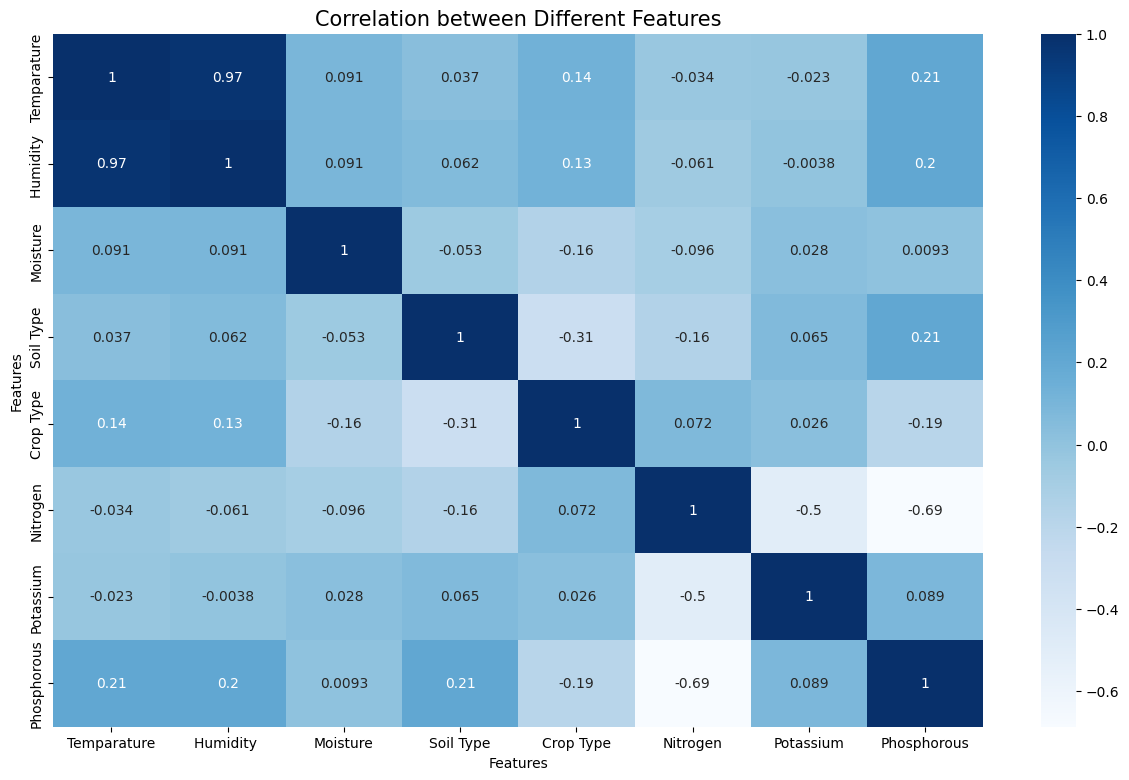

In [39]:
# Select only numeric columns
numeric_data_1 = fertilizer.select_dtypes(include=['number'])

# Create a figure and a set of subplots
fig, ax = plt.subplots(1, 1, figsize=(15, 9))

# Create the heatmap with the 'Blues' palette
sns.heatmap(numeric_data_1.corr(), annot=True, cmap='Blues')
ax.set(xlabel='Features')
ax.set(ylabel='Features')

# Customize the plot
plt.title('Correlation between Different Features', fontsize=15, c='black')

# Display the plot
plt.show()